In [1]:
# Set up working environment for CoLoMoTo
import ginsim
import biolqm
import maboss
from colomoto_jupyter import tabulate
# for fixpoint table display
from itertools import combinations
# for iterating over sets
import matplotlib.pyplot as plt
# for modifying plots

This notebook has been executed using the docker image `colomoto/colomoto-docker:2021-10-01`

In [3]:
lrg = ginsim.load("/tmp/colomoto9p225c31_BCCFINAL.zginml")

In [4]:
## Use biolqm to visualize the stable states
model_biolqm = ginsim.to_biolqm(lrg) # convert to biolqm

In [9]:
model_maboss = biolqm.to_maboss(model_biolqm) # convert to maboss
maboss_BCC = model_maboss
maboss_BCC.update_parameters(sample_count=5000,max_time=30, time_tick=0.5, thread_count=6)

In [10]:
maboss_BCC.network.set_istate("FZD", [0, 1])
maboss_BCC.network.set_istate("TNFRSF1A", [0, 1])
maboss_BCC.network.set_istate("IL22R", [0, 1])
maboss_BCC.network.set_istate("IL17R", [0, 1])
maboss_BCC.network.set_istate("EP2", [0, 1])
maboss_BCC.network.set_istate("IL6R", [0, 1])
maboss_BCC.network.set_istate("IL4R", [0, 1])
maboss_BCC.network.set_istate("DNAdam", [0, 1])

#Set the mutations
maboss_BCC.mutate("PTCH1", "OFF")
maboss_BCC.mutate("GNAS", "OFF")
maboss_BCC.mutate("TP53", "OFF")
maboss_BCC.mutate("VDR", "OFF")

In [11]:
maboss_BCC.network.set_output(('Apoptosis', 'Proliferation', 'Survival', 'Differentiation', 'Tissue_remodelling_Angiogenesis', 'Cell_cycle_arrest'))
run_maboss_bcc = maboss_BCC.run()

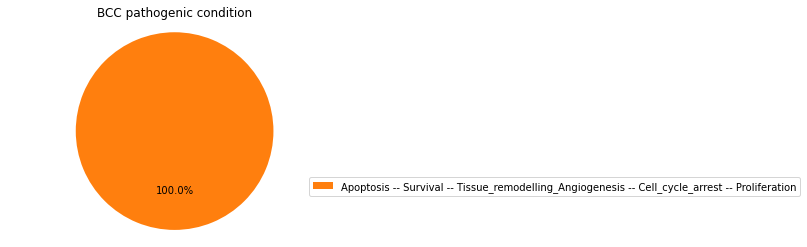

In [18]:
run_maboss_bcc.plot_piechart()
plt.title('BCC pathogenic condition')
plt.savefig('BCC_pathogenic_piechart.png')

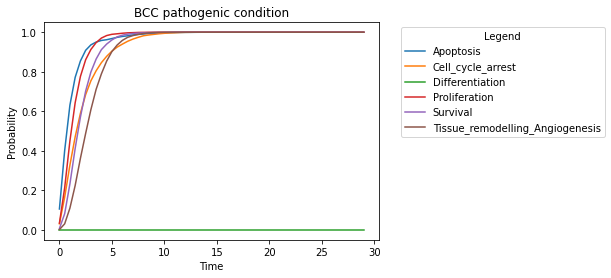

<Figure size 432x288 with 0 Axes>

In [15]:
prob_traj = run_maboss_bcc.get_nodes_probtraj()

# Plotting the data
prob_traj.plot(legend=False)
plt.title('BCC pathogenic condition')
plt.xlabel('Time')  # assuming the x-axis represents time
plt.ylabel('Probability')  # adjust depending on what 'probtraj' represents
plt.grid(False)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.savefig('BCC_pathogenic_trajectory.png', dpi=300)